In [1]:
!pip install pystan

In [2]:
!pip install fbprophet

In [3]:
# Import libraries
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [4]:
# Read in data
df = pd.read_csv('../../data/example_wp_peyton_manning.csv')
df['y'] = np.log(df['y'])
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [5]:
# Fit a time series model
m = Prophet()
m.fit(df);

In [10]:
# Predict future time series
future = m.make_future_dataframe(periods=365)
future.tail(2)

,ds
3268,2017-01-18
3269,2017-01-19


In [11]:
# Attach predicted values - yhat
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.200900,7.455461,8.826946
3266,2017-01-16,8.525905,7.774436,9.253792
3267,2017-01-17,8.313265,7.580007,9.034882
3268,2017-01-18,8.145861,7.409509,8.822565
3269,2017-01-19,8.157749,7.326014,8.885596


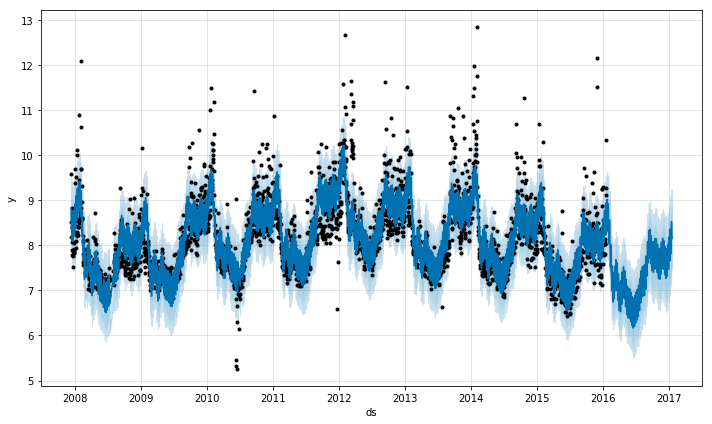

In [8]:
# Plot the forecasted values
from matplotlib import pyplot as plt
%matplotlib inline

m.plot(forecast);

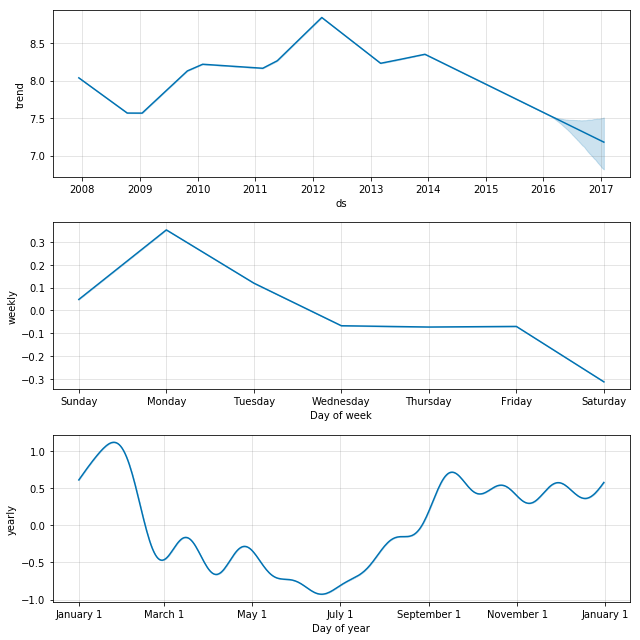

In [9]:
# Time Series Decomposition
m.plot_components(forecast);